# Understanding political polarity with Tweets

Goal: To combine textual Twitter data from politicians with sentiment
analysis to better understand the similarities/differences between
how national politicians speak.

## Generating a database

We're going to use Alex Litel's [congresstweets](https://github.com/alexlitel/congresstweets)
database for all of our political tweets.

To get started, let's load all of that data into a SQLite database.

In [3]:
# Create global variables

TWEETS_DIRECTORY = 'tweets'
TWEETS_DATABASE_FILENAME = 'tweets_data.db'


In [58]:
# Clone the Tweets repo. This takes a few minutes to run at start.
import os.path
from git import Repo

if not os.path.isdir(TWEETS_DIRECTORY):
    Repo.clone_from('https://github.com/alexlitel/congresstweets', 'tweets')
    print('Cloned tweets repo...')
else:
    print('Using existing tweets repo...')

Using existing tweets repo...


In [59]:
# Get the filenames containing the tweets
from os import listdir
from os.path import isfile, join

file_path = join(TWEETS_DIRECTORY, 'data')

tweet_files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
print('Found', len(tweet_files), 'files containing tweet data...')

Found 1328 files containing tweet data...


In [60]:
# Configure the database
import sqlite3
import os

try:
    os.remove(TWEETS_DATABASE_FILENAME)
except OSError:
    pass

conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)

with conn:
    conn.execute('DROP TABLE IF EXISTS tweets') # Resets the table if it already exists
    conn.execute("""
    CREATE TABLE tweets (
        id INTEGER NOT NULL PRIMARY KEY,
        data JSON,
        sentiment JSON
    )
    """)


In [61]:
# Add tweets to the database
import json

conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)


def insert_tweet(connection, tweet):
    try:
        connection.execute('INSERT INTO tweets VALUES (?, ?, null)', [
            tweet['id'],
            json.dumps(tweet)
        ])
    except sqlite3.IntegrityError as e:
        print('Skippping duplicate tweet id:', tweet['id'])

with conn:
    for index, tweet_filename in enumerate(tweet_files):
        with open(join(TWEETS_DIRECTORY, 'data',
                       tweet_filename)) as tweets_file:
            tweets = json.load(tweets_file)
            for tweet in tweets:
                try:
                    tweet_id = tweet['id']
                    insert_tweet(conn, tweet)
                except KeyError as e:
                    # Handle case with tweets inside the tweet['yesterday'] object.
                    for yesterday_tweet in tweet['yesterday']:
                        insert_tweet(conn, yesterday_tweet)
                    for today_tweet in tweet['today']:
                        insert_tweet(conn, today_tweet)
            print('Added', tweet_filename, 'File', index + 1, 'of',
                  len(tweet_files))

Skippping duplicate tweet id: 877601815331708928
Added 2017-06-21.json File 1 of 1328
Added 2017-06-22.json File 2 of 1328
Added 2017-06-23.json File 3 of 1328
Skippping duplicate tweet id: 878620230196514816
Added 2017-06-24.json File 4 of 1328
Added 2017-06-25.json File 5 of 1328
Added 2017-06-26.json File 6 of 1328
Skippping duplicate tweet id: 879732809363075072
Added 2017-06-27.json File 7 of 1328
Added 2017-06-28.json File 8 of 1328
Added 2017-06-29.json File 9 of 1328
Skippping duplicate tweet id: 880840628732669953
Added 2017-06-30.json File 10 of 1328
Skippping duplicate tweet id: 881162730501062658
Added 2017-07-01.json File 11 of 1328
Added 2017-07-02.json File 12 of 1328
Added 2017-07-03.json File 13 of 1328
Skippping duplicate tweet id: 882265745526149120
Added 2017-07-04.json File 14 of 1328
Added 2017-07-05.json File 15 of 1328
Added 2017-07-06.json File 16 of 1328
Added 2017-07-07.json File 17 of 1328
Added 2017-07-08.json File 18 of 1328
Added 2017-07-09.json File 19 o

Added 2017-12-09.json File 168 of 1328
Added 2017-12-10.json File 169 of 1328
Added 2017-12-11.json File 170 of 1328
Added 2017-12-12.json File 171 of 1328
Added 2017-12-13.json File 172 of 1328
Added 2017-12-14.json File 173 of 1328
Added 2017-12-15.json File 174 of 1328
Added 2017-12-16.json File 175 of 1328
Added 2017-12-17.json File 176 of 1328
Added 2017-12-18.json File 177 of 1328
Added 2017-12-19.json File 178 of 1328
Added 2017-12-20.json File 179 of 1328
Added 2017-12-21.json File 180 of 1328
Added 2017-12-22.json File 181 of 1328
Added 2017-12-23.json File 182 of 1328
Added 2017-12-24.json File 183 of 1328
Added 2017-12-25.json File 184 of 1328
Added 2017-12-26.json File 185 of 1328
Added 2017-12-27.json File 186 of 1328
Added 2017-12-28.json File 187 of 1328
Added 2017-12-29.json File 188 of 1328
Added 2017-12-30.json File 189 of 1328
Added 2017-12-31.json File 190 of 1328
Added 2018-01-01.json File 191 of 1328
Added 2018-01-02.json File 192 of 1328
Added 2018-01-03.json Fil

Added 2018-07-06.json File 377 of 1328
Added 2018-07-07.json File 378 of 1328
Added 2018-07-08.json File 379 of 1328
Added 2018-07-09.json File 380 of 1328
Added 2018-07-10.json File 381 of 1328
Added 2018-07-11.json File 382 of 1328
Added 2018-07-12.json File 383 of 1328
Added 2018-07-13.json File 384 of 1328
Added 2018-07-14.json File 385 of 1328
Skippping duplicate tweet id: 1018672798343073792
Added 2018-07-15.json File 386 of 1328
Added 2018-07-16.json File 387 of 1328
Added 2018-07-17.json File 388 of 1328
Skippping duplicate tweet id: 1019761978192121856
Added 2018-07-18.json File 389 of 1328
Added 2018-07-19.json File 390 of 1328
Added 2018-07-20.json File 391 of 1328
Added 2018-07-21.json File 392 of 1328
Added 2018-07-22.json File 393 of 1328
Added 2018-07-23.json File 394 of 1328
Added 2018-07-24.json File 395 of 1328
Skippping duplicate tweet id: 1022303355018899456
Added 2018-07-25.json File 396 of 1328
Added 2018-07-26.json File 397 of 1328
Skippping duplicate tweet id: 1

Skippping duplicate tweet id: 1085002910885392389
Added 2019-01-14.json File 569 of 1328
Skippping duplicate tweet id: 1085257286828937216
Skippping duplicate tweet id: 1085302332324302848
Skippping duplicate tweet id: 1085236210963021824
Added 2019-01-15.json File 570 of 1328
Added 2019-01-16.json File 571 of 1328
Added 2019-01-17.json File 572 of 1328
Added 2019-01-18.json File 573 of 1328
Added 2019-01-19.json File 574 of 1328
Added 2019-01-20.json File 575 of 1328
Added 2019-01-21.json File 576 of 1328
Added 2019-01-22.json File 577 of 1328
Added 2019-01-23.json File 578 of 1328
Added 2019-01-24.json File 579 of 1328
Added 2019-01-25.json File 580 of 1328
Added 2019-01-26.json File 581 of 1328
Added 2019-01-27.json File 582 of 1328
Added 2019-01-28.json File 583 of 1328
Skippping duplicate tweet id: 1090099003629412352
Skippping duplicate tweet id: 1090101317740171266
Skippping duplicate tweet id: 1090109096458637312
Skippping duplicate tweet id: 1090099837666775042
Skippping dupli

Added 2019-07-06.json File 742 of 1328
Added 2019-07-07.json File 743 of 1328
Added 2019-07-08.json File 744 of 1328
Added 2019-07-09.json File 745 of 1328
Added 2019-07-10.json File 746 of 1328
Added 2019-07-11.json File 747 of 1328
Added 2019-07-12.json File 748 of 1328
Added 2019-07-13.json File 749 of 1328
Added 2019-07-14.json File 750 of 1328
Added 2019-07-15.json File 751 of 1328
Added 2019-07-16.json File 752 of 1328
Added 2019-07-17.json File 753 of 1328
Added 2019-07-18.json File 754 of 1328
Added 2019-07-19.json File 755 of 1328
Added 2019-07-20.json File 756 of 1328
Added 2019-07-21.json File 757 of 1328
Added 2019-07-22.json File 758 of 1328
Added 2019-07-23.json File 759 of 1328
Added 2019-07-24.json File 760 of 1328
Added 2019-07-25.json File 761 of 1328
Added 2019-07-26.json File 762 of 1328
Added 2019-07-27.json File 763 of 1328
Added 2019-07-28.json File 764 of 1328
Added 2019-07-29.json File 765 of 1328
Added 2019-07-30.json File 766 of 1328
Added 2019-07-31.json Fil

Added 2020-02-03.json File 954 of 1328
Added 2020-02-04.json File 955 of 1328
Added 2020-02-05.json File 956 of 1328
Added 2020-02-06.json File 957 of 1328
Added 2020-02-07.json File 958 of 1328
Added 2020-02-08.json File 959 of 1328
Added 2020-02-09.json File 960 of 1328
Added 2020-02-10.json File 961 of 1328
Added 2020-02-11.json File 962 of 1328
Added 2020-02-12.json File 963 of 1328
Added 2020-02-13.json File 964 of 1328
Added 2020-02-14.json File 965 of 1328
Added 2020-02-15.json File 966 of 1328
Added 2020-02-16.json File 967 of 1328
Added 2020-02-17.json File 968 of 1328
Added 2020-02-18.json File 969 of 1328
Added 2020-02-19.json File 970 of 1328
Added 2020-02-20.json File 971 of 1328
Added 2020-02-21.json File 972 of 1328
Added 2020-02-22.json File 973 of 1328
Added 2020-02-23.json File 974 of 1328
Added 2020-02-24.json File 975 of 1328
Added 2020-02-25.json File 976 of 1328
Added 2020-02-26.json File 977 of 1328
Added 2020-02-27.json File 978 of 1328
Added 2020-02-28.json Fil

Added 2020-08-27.json File 1160 of 1328
Added 2020-08-28.json File 1161 of 1328
Added 2020-08-29.json File 1162 of 1328
Added 2020-08-30.json File 1163 of 1328
Added 2020-08-31.json File 1164 of 1328
Added 2020-09-01.json File 1165 of 1328
Added 2020-09-02.json File 1166 of 1328
Added 2020-09-03.json File 1167 of 1328
Added 2020-09-04.json File 1168 of 1328
Added 2020-09-05.json File 1169 of 1328
Added 2020-09-06.json File 1170 of 1328
Added 2020-09-07.json File 1171 of 1328
Added 2020-09-08.json File 1172 of 1328
Added 2020-09-09.json File 1173 of 1328
Added 2020-09-10.json File 1174 of 1328
Added 2020-09-11.json File 1175 of 1328
Added 2020-09-12.json File 1176 of 1328
Added 2020-09-13.json File 1177 of 1328
Added 2020-09-14.json File 1178 of 1328
Added 2020-09-15.json File 1179 of 1328
Added 2020-09-16.json File 1180 of 1328
Added 2020-09-17.json File 1181 of 1328
Added 2020-09-18.json File 1182 of 1328
Added 2020-09-19.json File 1183 of 1328
Added 2020-09-20.json File 1184 of 1328


In [62]:
conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)

with conn:
    cur = conn.cursor()
    cur.execute('SELECT COUNT(id) FROM tweets')
    print('Found', cur.fetchone()[0], 'tweets in the database.')

Found 3047625 tweets in the database.


# Add sentiment data to the database

Here we'll use VADER from nltk to generate sentiment stats for each tweet.
Then, we'll add those sentiment stats to the database.

In [5]:
# Import and configure the sentiment analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import sqlite3

analyser = SentimentIntensityAnalyzer()

In [8]:
conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)

with conn:
    cur = conn.cursor()

    print('Getting tweets...')
    completed_tweets_count = cur.execute("""
        SELECT
            COUNT(id)
        FROM
            tweets
        WHERE
            sentiment IS NOT NULL
    """).fetchone()[0]
    
    print(completed_tweets_count, 'tweets already have sentiment data')

Getting tweets...
1349113 tweets already have sentiment data


In [9]:
import sqlite3
import os
import json

conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)
conn.isolation_level = "DEFERRED"

has_null_sentiment_tweets = True

completed_batches_count = 0

insert_batch_size = 10000


def insert_batch_to_db(values_to_commit):
    """
    Batch insert tweet data into the database.
    """
    sql = """
        INSERT OR REPLACE INTO
            tweets (id, sentiment, data) 
        VALUES (
            ?, 
            ?,
            (
                SELECT
                    data
                FROM
                    tweets
                WHERE
                    id = ?
            )
        );
    """
    cur.executemany(sql, values_to_commit)


def generate_and_insert_tweets(results):
    """
    Generates sentiment data and updates the database with the new data, given SQL results.
    """
    values_to_commit = []
    for index, result in enumerate(results):
        tweet_text = result[0]
        tweet_id = result[1]

        sentiment_scores = analyser.polarity_scores(tweet_text)

        values_to_commit.append(
            [tweet_id, json.dumps(sentiment_scores), tweet_id])

        if (index + 1) % insert_batch_size == 0:
            insert_batch_to_db(values_to_commit)

            print('updated tweet',
                  (completed_batches_count * 50000) + index + 1)
            values_to_commit = []  # Reset to empty


with conn:
    cur = conn.cursor()

    while has_null_sentiment_tweets:
        print('Getting tweets...')

        # Query sentiment data in batches of 50k
        cur.execute("""
            SELECT
                json_extract(data, '$.text'), id
            FROM
                tweets
            WHERE
                sentiment IS NULL
            LIMIT 50000
        """)
        results = cur.fetchall()

        # Case: all tweets already have sentiment data
        if len(results) == 0:
            has_null_sentiment_tweets = False
            break

        values_to_commit = []

        cur.execute("begin")
        try:
            generate_and_insert_tweets(results)
        except sqlite3.Error as e:
            cur.execute('rollback')
        finally:
            conn.execute('commit')

        completed_batches_count += 1

Getting tweets...
updated tweet 10000
updated tweet 20000
updated tweet 30000
updated tweet 40000
updated tweet 50000
Getting tweets...
updated tweet 60000
updated tweet 70000
updated tweet 80000
updated tweet 90000


KeyboardInterrupt: 

In [10]:
import sqlite3

conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)

with conn:
    cur = conn.cursor()
    print('Getting count...')
    cur.execute("SELECT COUNT(id) FROM tweets WHERE sentiment NOT NULL")
    print(cur.fetchone()[0], 'database record(s) have sentiment information')

Getting count...
1449113 database record(s) have sentiment information


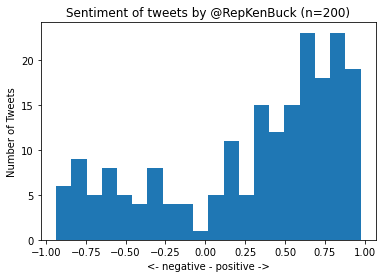

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import sqlite3

conn = sqlite3.connect(TWEETS_DATABASE_FILENAME)

results = []

TWITTER_ACCOUNT_NAME = 'RepKenBuck'

with conn:
    cur = conn.cursor()
    cur.execute("""
        SELECT json_extract(sentiment, '$.compound')
        FROM tweets
        WHERE (
          json_extract(data, '$.screen_name')=?
          AND
          json_extract(sentiment, '$.compound') IS NOT 0
        )
        LIMIT 200
        COLLATE NOCASE
    """, [TWITTER_ACCOUNT_NAME])
    results = cur.fetchall()

compound_values = [result[0] for result in results]
n_bins = 20

plt.hist(compound_values, bins=n_bins)

plt.ylabel('Number of Tweets')
plt.title('Sentiment of tweets by @{0} (n={1})'.format(
    TWITTER_ACCOUNT_NAME,
    len(compound_values)
  ))
plt.xlabel('<- negative - positive ->')

plt.show()